<a href="https://colab.research.google.com/github/hanglee1711/Customer-Segmentation/blob/main/Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation  Using K-Means Clustering**

## **Table of Contents**
 1. [Import Libraries](#Import-Libraries) <br>
 2. [Data Understanding](#Data-Understanding) <br>
 3. [Data Pre-processing](#Data-Pre-processing) <br>
 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis) <br>
 5. [RFM Analysis](#RFM-Analysis) <br>
 6. [K-Means Clustering on RFM Values](#K-Means-Clustering-on-RFM-Values) <br>
 7. [Results](#Results) <br>
 8. [Conclusion](#Conclusion) <br>


# **Import Libraries**

In [214]:
import numpy as np
import pandas as pd
import missingno as msno    # Visualize missing data
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# Time and warnings
import time
import warnings

# Settings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# **Data Understanding**

In [186]:
#Import dataset
df= pd.read_excel('Online Retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [188]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Data Pre-processing**

**Missing values**

In [189]:
# Check number of missing values
null_values = df.isnull().sum()
null_percen = df.isnull().sum() * 100/len(df)
print(pd.DataFrame ({'Number': null_values,
               'Percentage': null_percen}))

             Number  Percentage
InvoiceNo         0    0.000000
StockCode         0    0.000000
Description    1454    0.268311
Quantity          0    0.000000
InvoiceDate       0    0.000000
UnitPrice         0    0.000000
CustomerID   135080   24.926694
Country           0    0.000000


<Axes: >

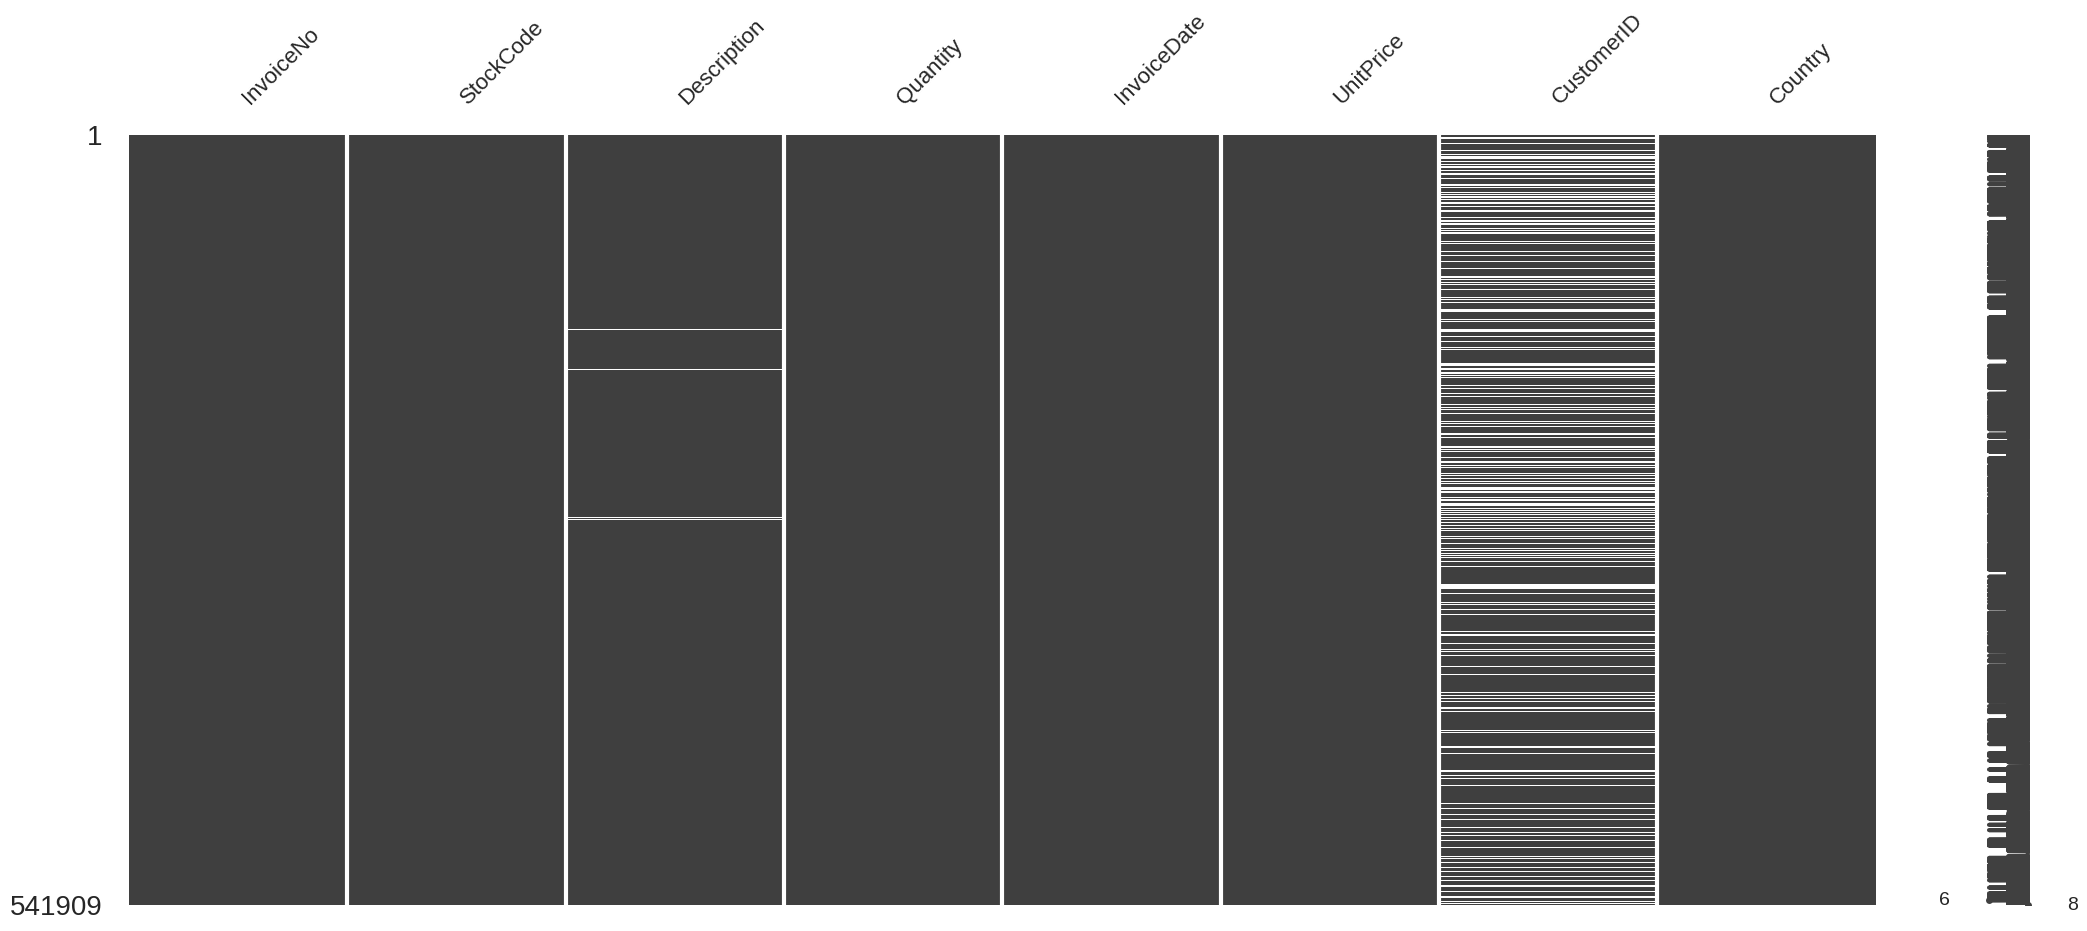

In [190]:
msno.matrix(df)

With approximately 25% missing CustomerID values (which accounts a quarter of dataset), I will remove all of the rows with missing CustomerID values.


Before removing missing CustomerID values, let's look at this:

In [191]:
df1 = df[df['CustomerID'].isnull() & df['Description'].isnull()]
print(f'There are {len(df1)} rows that have both missing "CustomerID" and "Description" values.')

There are 1454 rows that have both missing "CustomerID" and "Description" values.


We can see that all the 1454 missing Description values have missing CustomerID values.
We decide to remove all the missing values in this dataset

In [192]:
# Remove missing values
df.dropna(inplace=True)

In [193]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Check for duplicate**

My question is: 'Which values in this data help distinguish between rows?'

In [194]:
df.duplicated().sum()

5225

In [195]:
df2 = df[df.duplicated() == True]
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


From this, I hypothesize that pairs InvoiceNo and StockCode are used to distinguish between rows

In [196]:
df3 = df[df[['InvoiceNo','StockCode']].duplicated()]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
406612,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
406617,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
406618,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
406619,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Let's take example:

In [197]:
df4 = df[(df['InvoiceNo'] ==  536409) & (df['StockCode'] == '90199C')]
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom


This example indicated that two different orders were created at the same time but in different quantities, or it could be that parts of a larger order were split.

=> We decided to keep rows at a higher value

In [198]:
df5 = df.groupby(['InvoiceNo', 'StockCode']) ['Quantity'].idxmax()
df = df.loc[df5].reset_index(drop=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [199]:
# Check again
c = df[df[['InvoiceNo','StockCode']].duplicated()]
len(c)

0

In [200]:
# Create a column to calculate total sales value for each transaction
df['TotalRevenue'] = df['UnitPrice'] * df['Quantity']
df['Year-Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396681 entries, 0 to 396680
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     396681 non-null  object        
 1   StockCode     396681 non-null  object        
 2   Description   396681 non-null  object        
 3   Quantity      396681 non-null  int64         
 4   InvoiceDate   396681 non-null  datetime64[ns]
 5   UnitPrice     396681 non-null  float64       
 6   CustomerID    396681 non-null  float64       
 7   Country       396681 non-null  object        
 8   TotalRevenue  396681 non-null  float64       
 9   Year-Month    396681 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 30.3+ MB


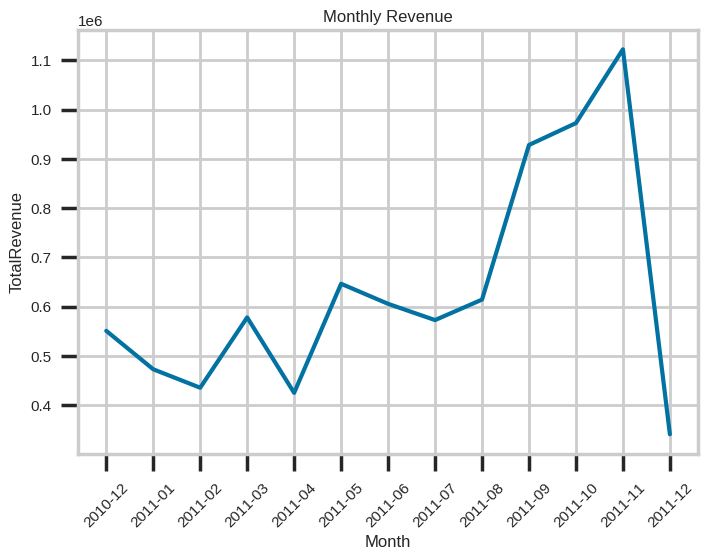

In [201]:
monthly_sales = df.groupby(['Year-Month'])['TotalRevenue'].sum()
plt.plot(monthly_sales)
plt.xticks(rotation = 45)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('TotalRevenue')
plt.show()

We can see that the total revenue of 2011-12 bottomed out.

In [202]:
df6 = df[df['Year-Month'] == '2011-12']
df6.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalRevenue
count,17027.000000,17027,17027.000000,17027.000000,17027.000000
mean,11.896517,2011-12-05 14:07:32.968814080,2.868527,15294.443472,19.998037
min,-80995.000000,2011-12-01 08:12:00,0.040000,12347.000000,-168469.600000
25%,2.000000,2011-12-04 11:00:00,0.850000,13969.000000,3.320000
50%,5.000000,2011-12-05 16:55:00,1.650000,15023.000000,9.900000
75%,12.000000,2011-12-07 12:55:00,2.950000,16904.000000,17.850000
max,80995.000000,2011-12-09 12:50:00,1599.260000,18283.000000,168469.600000
std,878.794048,NaN,15.481577,1729.323093,1827.639053


We can see that data was just collected in the first 9 days of 2011. I decide to remove them

In [203]:
# Remove 9 days of 2011-12
df = df[df['Year-Month'] != '2011-12'].reset_index(drop=True)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year-Month
379649,C579886,23491,VINTAGE JINGLE BELLS HEART,-1,2011-11-30 17:39:00,8.25,15676.0,United Kingdom,-8.25,2011-11
379650,C579886,85088,CANDY SPOT HAND BAG,-2,2011-11-30 17:39:00,2.10,15676.0,United Kingdom,-4.20,2011-11
379651,C579887,23490,T-LIGHT HOLDER HANGING LOVE BIRD,-3,2011-11-30 17:42:00,3.75,16717.0,United Kingdom,-11.25,2011-11
379652,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,-1.25,2011-11
379653,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,-7.95,2011-11


# **Exploratory Data Analysis**

In [204]:
# Find unique numbers of attributes
df.nunique()

,0
InvoiceNo,21269
StockCode,3676
Description,3887
Quantity,425
InvoiceDate,19636
UnitPrice,578
CustomerID,4331
Country,37
TotalRevenue,3910
Year-Month,12


In [205]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalRevenue
count,379654.000000,379654,379654.000000,379654.000000,379654.000000
mean,12.327269,2011-07-03 12:54:00.688890368,3.480553,15274.664205,20.868220
min,-74215.000000,2010-12-01 08:26:00,0.000000,12346.000000,-77183.600000
25%,2.000000,2011-04-01 11:31:00,1.250000,13914.000000,4.680000
50%,6.000000,2011-07-20 11:22:30,1.950000,15142.000000,11.900000
75%,12.000000,2011-10-11 14:52:00,3.750000,16777.000000,19.800000
max,74215.000000,2011-11-30 17:42:00,38970.000000,18287.000000,77183.600000
std,177.836808,NaN,71.224051,1713.616450,214.549277


**Quantity**
- There are some rows that have negative values for quantity. I assume negative values stem form returned products or canceled orders.

**Unit Price**
- There are some rows  that have sale price of 0

**Invoice Date**
- The data was just collected in the first 9 days of 2011.

In [206]:
# Calculate numbers of negative-quantity rows
negative_quantity = df[df['Quantity'] < 0]
# Canceled invoices start with a letter C
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
canceled_invoice = df[df['InvoiceNo'].str.contains('C')]
print(canceled_invoice)
print(f'There are {len(negative_quantity)} negative quantity rows in the dataset')
print(f'There are {len(canceled_invoice)} canceled invoice')

       InvoiceNo StockCode                          Description  Quantity  \
371202   C536379         D                             Discount        -1   
371203   C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
371204   C536391     21484          CHICK GREY HOT WATER BOTTLE       -12   
371205   C536391     21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
371206   C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                                  ...       ...   
379649   C579886     23491           VINTAGE JINGLE BELLS HEART        -1   
379650   C579886     85088                  CANDY SPOT HAND BAG        -2   
379651   C579887     23490     T-LIGHT HOLDER HANGING LOVE BIRD        -3   
379652   C579887     84946         ANTIQUE SILVER T-LIGHT GLASS        -1   
379653   C579887     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        -1   

               InvoiceDate  UnitPrice  CustomerID         Country  \
371202

=> Therefore, the negative quantity stem from these refunds. I will remove the canceled rows

In [207]:
# Remove canceled invoice
df = df[df['Quantity'] >=0].reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year-Month
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
371197,579885,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-11-30 17:37:00,2.95,15444.0,United Kingdom,2.95,2011-11
371198,579885,85159A,"BLACK TEA,COFFEE,SUGAR JARS",1,2011-11-30 17:37:00,1.95,15444.0,United Kingdom,1.95,2011-11
371199,579885,85168B,BLACK BAROQUE CARRIAGE CLOCK,1,2011-11-30 17:37:00,9.95,15444.0,United Kingdom,9.95,2011-11
371200,579885,85185B,PINK HORSE SOCK PUPPET KIT,2,2011-11-30 17:37:00,2.95,15444.0,United Kingdom,5.90,2011-11


In [208]:
# Remove rows that have UnitPrice = 0
df = df[df['UnitPrice'] !=0.0 ].reset_index(drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Year-Month
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
371161,579885,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-11-30 17:37:00,2.95,15444.0,United Kingdom,2.95,2011-11
371162,579885,85159A,"BLACK TEA,COFFEE,SUGAR JARS",1,2011-11-30 17:37:00,1.95,15444.0,United Kingdom,1.95,2011-11
371163,579885,85168B,BLACK BAROQUE CARRIAGE CLOCK,1,2011-11-30 17:37:00,9.95,15444.0,United Kingdom,9.95,2011-11
371164,579885,85185B,PINK HORSE SOCK PUPPET KIT,2,2011-11-30 17:37:00,2.95,15444.0,United Kingdom,5.90,2011-11


**What are the top 5 countries with the highest Sales?**

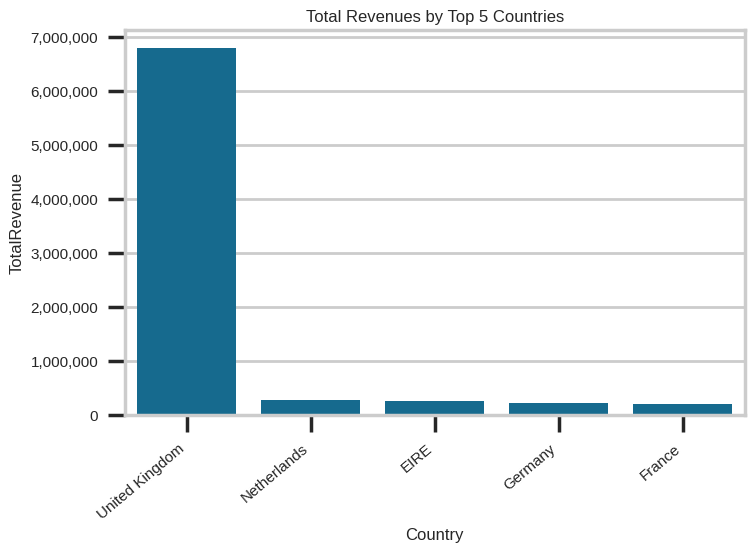

In [209]:
# Find top 5 countries
df_top = df.groupby('Country')['TotalRevenue'].sum()
df_top = df_top.sort_values(ascending=False)
df_top = df_top.reset_index().head(5)
# Visualize
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.barplot(x='Country', y='TotalRevenue', data=df_top, estimator=max, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Revenues by Top 5 Countries")
plt.show()

Unsurprisingly, as a UK-based online retail company, the United Kingdom has the highest total sales

**What are the top 5 countries with the highest number of customers?**

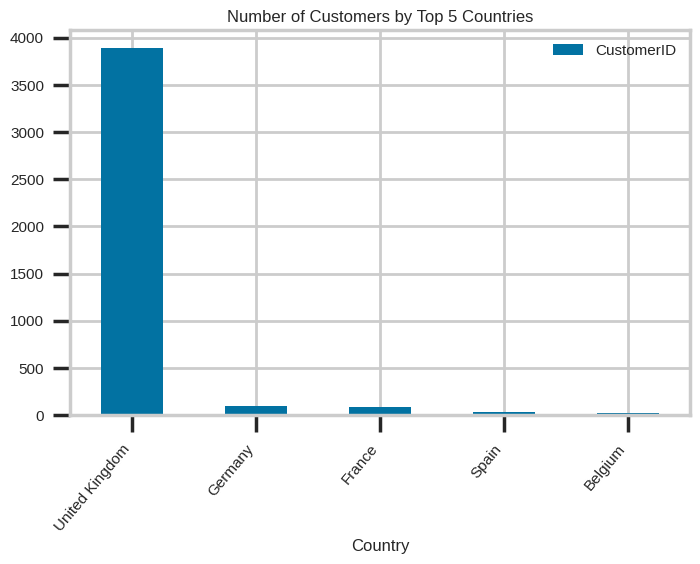

In [210]:
# Find top 5 countries
df_top1 = df.groupby('Country')['CustomerID'].nunique()
df_top1 = df_top1.sort_values(ascending = False)
df_top1 = df_top1.reset_index().head(5)

# Visualize
fig, ax = plt.subplots(figsize=(8,5))
df_top1.plot(kind="bar",x="Country", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.title("Number of Customers by Top 5 Countries")
plt.show()

Similarly, the United Kingdom has the highest number of customers compared to the other countries.

# **RFM Analysis**

**Recency**

In [211]:
# Set the reference date to the end date of data
reference_date = df['InvoiceDate'].max()

# Group data by CustomerID
grouped = df.groupby('CustomerID') ['InvoiceDate'].max()

# Calculate recency for each customer by substracting the most recent purchase date from the reference date
recency = (reference_date - grouped).dt.days
recency.sort_values(ascending=False).head()


,InvoiceDate
CustomerID,
16583.0,364
12791.0,364
15350.0,364
16048.0,364
18011.0,364


**Frequency**

In [212]:
frequency = df.groupby('CustomerID') ['InvoiceNo'].count()
frequency.sort_values(ascending=False).head()

,InvoiceNo
CustomerID,
17841.0,7022
14911.0,5351
14096.0,4555
12748.0,4008
14606.0,2565


**Monetary**

In [213]:
monetary = df.groupby('CustomerID') ['TotalRevenue'].sum()
monetary.sort_values(ascending=False).head()

,TotalRevenue
CustomerID,
14646.0,268478.00
18102.0,248171.76
17450.0,192828.39
14911.0,136732.25
12415.0,124914.53


In [215]:
df_rfm = pd.DataFrame({ 'Recency': recency,
                       'Frequency': frequency,
                       'Monetary': monetary})

df_rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,1,77183.60
12347.0,30,171,4085.18
12348.0,66,27,1744.44
12349.0,9,73,1757.55
12350.0,301,17,334.40


**RFM Segmentation**

In [216]:
df_rfm['r_quartile'] = pd.qcut(df_rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
df_rfm['f_quartile'] = pd.qcut(df_rfm['Frequency'], 5, labels=[1,2,3,4,5]).astype(int)
df_rfm['m_quartile'] = pd.qcut(df_rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)
df_rfm['RFM_Score'] = df_rfm['r_quartile'].astype(int) + df_rfm['f_quartile'].astype(int) + df_rfm['m_quartile'].astype(int)
df_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,316,1,77183.60,1,1,5,7
12347.0,30,171,4085.18,4,5,5,14
12348.0,66,27,1744.44,3,2,4,9
12349.0,9,73,1757.55,5,4,4,13
12350.0,301,17,334.40,1,2,2,5


In [217]:
def assign_rfm_level(row):
  if row['RFM_Score'] >= 10:
    return 'Best Customers'
  elif (row['RFM_Score'] < 10) and (row['RFM_Score'] >= 6):
    return 'Loyal Customers'
  elif (row['RFM_Score'] < 6) and (row['RFM_Score'] >= 4):
    return 'Potential Loyalists'
  elif (row['RFM_Score'] < 4) and (row['RFM_Score'] >= 2):
    return 'Promising'
  else:
    return 'Needs Attention'
df_rfm['RFM_Level'] = df_rfm.apply(assign_rfm_level, axis = 1)
df_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,316,1,77183.60,1,1,5,7,Loyal Customers
12347.0,30,171,4085.18,4,5,5,14,Best Customers
12348.0,66,27,1744.44,3,2,4,9,Loyal Customers
12349.0,9,73,1757.55,5,4,4,13,Best Customers
12350.0,301,17,334.40,1,2,2,5,Potential Loyalists


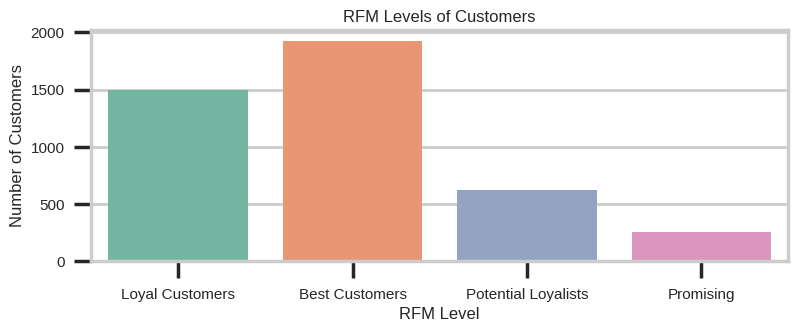

In [218]:
# Visualize the RFM Level Customers
plt.figure(figsize=(9,3))
sns.countplot(data= df_rfm, x = 'RFM_Level', palette ='Set2')
plt.xlabel('RFM Level', fontsize = 12)
plt.ylabel('Number of Customers')
plt.title('RFM Levels of Customers')
plt.show()

# **K-Means Clustering**

K-Means clustering is one of the distance-based and unsupervised machine learning algorithms. It partitions the data points into k clusters based on the Euclidean Distance used for the clustering. It is sensitive to skewness and outliers, which can cause the clusters to be distorted and lead to inaccuracies in the results. In this manner, log transform can be used to turn a skewed distribution into a normal or less-skewed. Following this, normalization is required to prevent one attribute outweighs another one in terms of the scales. Finally, before applying the K-Means Clustering algorithm, the optimum number of k should be defined. The two ways of defining the number of clusters in this dataset are as follows:<br>

• Elbow Method<br>
• Silhouette Method<br>

First, let's check the distribution of RFM values to decide whether a log transform is needed or not.

In [219]:
# Descriptive stastitics
df_rfm.describe()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
count,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000,4297.000000
mean,90.460088,86.377938,1942.041476,3.010007,2.989295,3.000000,8.999302
std,98.574043,210.613806,8345.379623,1.419682,1.415818,1.414707,3.546807
min,0.000000,1.000000,2.900000,1.000000,1.000000,1.000000,3.000000
25%,15.000000,17.000000,302.460000,2.000000,2.000000,2.000000,6.000000
50%,49.000000,39.000000,647.920000,3.000000,3.000000,3.000000,9.000000
75%,145.000000,95.000000,1592.120000,4.000000,4.000000,4.000000,12.000000
max,364.000000,7022.000000,268478.000000,5.000000,5.000000,5.000000,15.000000


Recency has a minimum value of 0, which may be unreasonable as it may indicate that some customers have purchased so recently that there is no time between their last purchase and the current time. I will drop this value

In [220]:
df_rfm = df_rfm[df_rfm['Recency'] != 0]

**Visualization of Distribution of RFM Values**

Text(0.5, 0.98, 'Histograms of Each RFM Value')

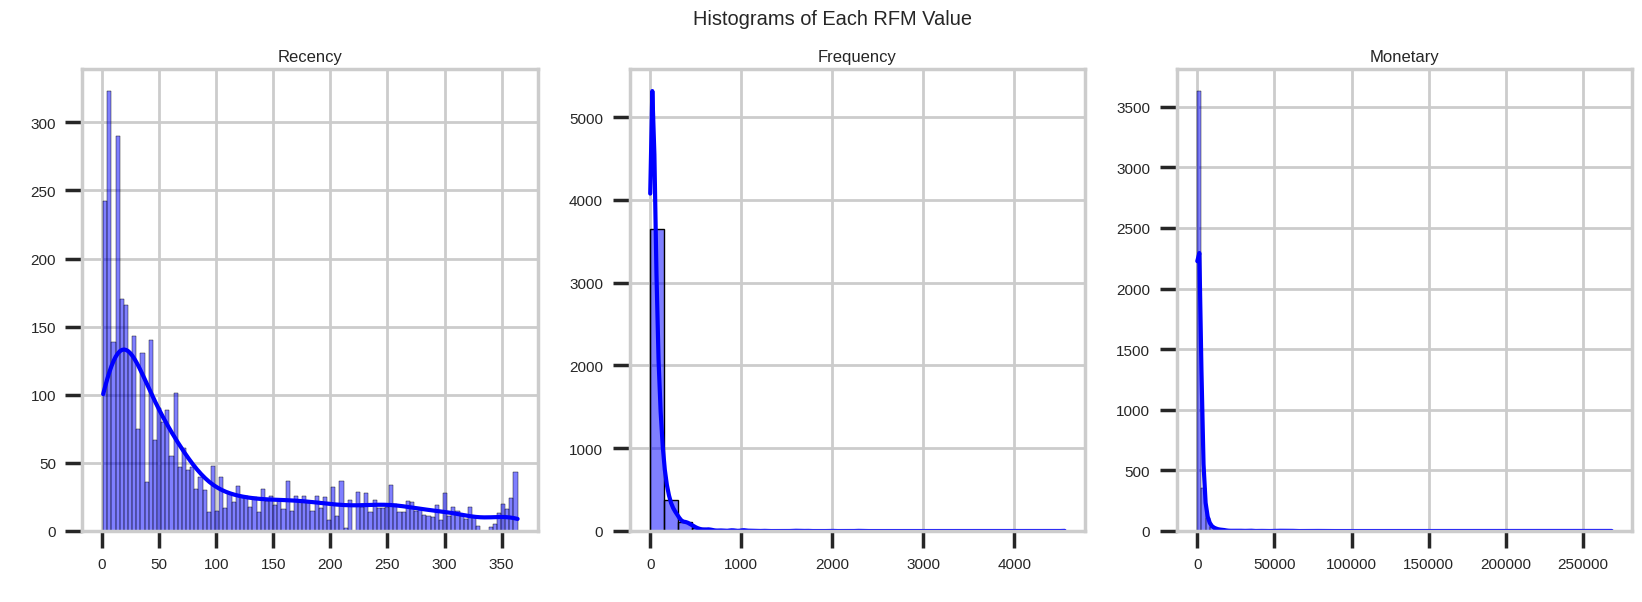

In [221]:
# Create histograms for each attribute
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(data = df_rfm, x = 'Recency', color = 'blue', bins=100, kde=True, ax=ax[0])
sns.histplot(data = df_rfm, x = 'Frequency', color = 'blue', bins=30, kde=True, ax=ax[1])
sns.histplot(data = df_rfm, x = 'Monetary', color = 'blue', bins=100, kde=True, ax=ax[2])

cols = df_rfm.columns[0:3]
i=0

for col in cols:
  ax[i].set_xlabel(' ')
  ax[i].set_ylabel(' ')
  ax[i].set_title(col)
  i = i+1
fig.suptitle('Histograms of Each RFM Value')



**RFM Values Log Tranform**

As it can be clearly seen that RFM attributes are highly skewed. The log transformation will be used to transform skewed data to approximately conform to normality.

In [222]:
# Select numeric columns
numeric_cols = df_rfm.select_dtypes(include=[np.number]).columns
# Log transformation
rfm_log = df_rfm[numeric_cols].apply(np.log).round(2)
rfm_log.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,5.76,0.00,11.25,0.00,0.00,1.61,1.95
12347.0,3.40,5.14,8.32,1.39,1.61,1.61,2.64
12348.0,4.19,3.30,7.46,1.10,0.69,1.39,2.20
12349.0,2.20,4.29,7.47,1.61,1.39,1.39,2.56
12350.0,5.71,2.83,5.81,0.00,0.69,0.69,1.61


Let's normalize the data to prevent one attribute outweights the other

**Normalization**

During the log transformation, if any value in the original data is 0 or negative, the log transformation will produce the value -inf (negative infinite) or NaN (not a number). We need to check!

In [223]:
print(rfm_log.isnull().sum())
print(np.isinf(rfm_log).sum())

Recency       0
Frequency     0
Monetary      0
r_quartile    0
f_quartile    0
m_quartile    0
RFM_Score     0
dtype: int64
Recency       0
Frequency     0
Monetary      0
r_quartile    0
f_quartile    0
m_quartile    0
RFM_Score     0
dtype: int64


There are 94 infinity values in Recency column.

In [224]:
infinity_values = rfm_log[rfm_log['Recency'] == -np.inf]
print(infinity_values)

Empty DataFrame
Columns: [Recency, Frequency, Monetary, r_quartile, f_quartile, m_quartile, RFM_Score]
Index: []


I decide to remove all 94 rows.

In [225]:
#scaling RFM attributes
scaler=StandardScaler()
rfm_scale=scaler.fit_transform(rfm_log)

#storing into a dataframe
rfm_scale=pd.DataFrame(rfm_scale,index=rfm_log.index,columns=rfm_log.columns)
rfm_scale.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,1.394929,-2.793876,3.800742,-1.662980,-1.654546,1.159242,-0.323817
12347.0,-0.264637,1.178856,1.440681,0.779938,1.163221,1.159242,1.210849
12348.0,0.290896,-0.243289,0.747967,0.270265,-0.446931,0.773110,0.232221
12349.0,-1.108484,0.521886,0.756022,1.166587,0.778185,0.773110,1.032917
12350.0,1.359769,-0.606555,-0.581077,-1.662980,-0.446931,-0.455489,-1.080030


Text(0.5, 0.98, 'Histograms of Each RFM Value')

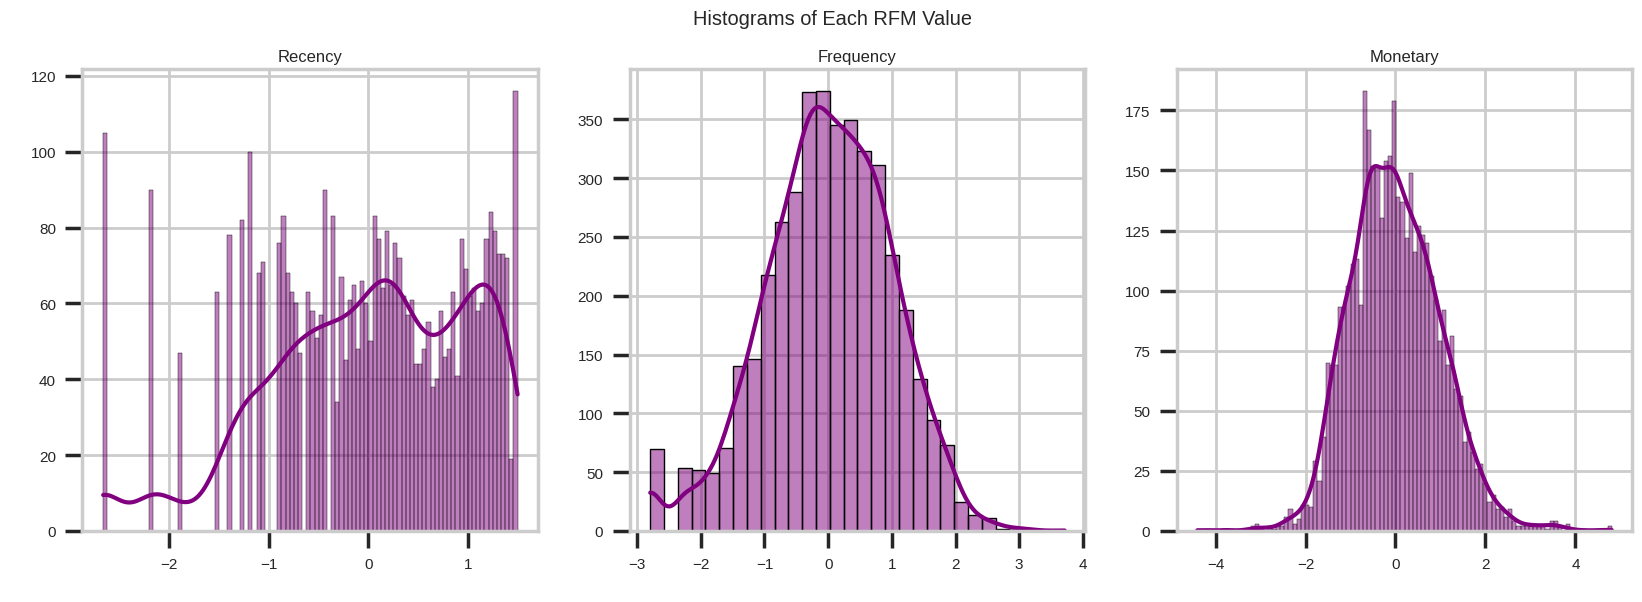

In [226]:
#creating histograms for each attribute
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(data=rfm_scale,x="Recency",color="purple",bins=100,kde=True,ax=ax[0])
sns.histplot(data=rfm_scale,x="Frequency",color="purple",bins=30,kde=True,ax=ax[1])
sns.histplot(data=rfm_scale,x="Monetary",color="purple",bins=100,kde=True,ax=ax[2])

cols=df_rfm.columns[0:3]
i=0

for col in cols:
    ax[i].set_xlabel(" ")
    ax[i].set_ylabel(" ")
    ax[i].set_title(col)

    i=i+1

fig.suptitle("Histograms of Each RFM Value")

By using the log transform method, we get an almost normal distribution in Frequency and Monetary. On the other hand, the distribution of Recency turns into a less-skewed one

# **Determine Optimum Number of Clusters**

**Elbow Method**

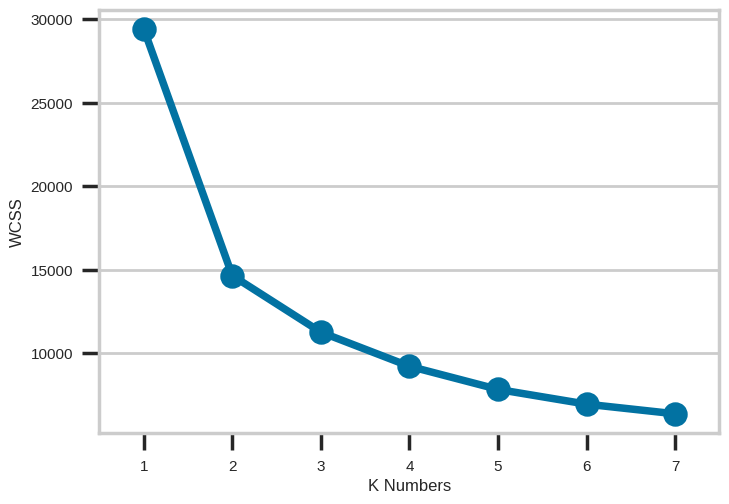

In [227]:
wcss = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(rfm_scale)
    wcss[k] = kmeans.inertia_

# plot the WCSS values
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In the picture above, we see the position of the elbow point is k = 3
 because when the number of clusters is larger
 then the rate of decline of the distortion function seems to be insignificant compared to before.

**Silhouette Method**

In [228]:
# find the optimum number of clusters (k) using the Silhouette method
for n_clusters in range(2,8):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(rfm_scale)
    clusters = kmeans.predict(rfm_scale)
    silhouette_avg = silhouette_score(rfm_scale, clusters)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.42118919131262417
For n_clusters = 3 The average silhouette_score is : 0.3161794148356387
For n_clusters = 4 The average silhouette_score is : 0.3285035694038533
For n_clusters = 5 The average silhouette_score is : 0.2889415867466338
For n_clusters = 6 The average silhouette_score is : 0.28767133421537056
For n_clusters = 7 The average silhouette_score is : 0.2907934587592612


By considering both methods, k=3 is selected as an optimum cluster number for k-means clustering algorithm.

**K-Means Clusters**

In [234]:
# clustering
clus = KMeans(n_clusters= 3)
clus.fit(rfm_scale)

# assigning the clusters to rfm_segmentation
df_rfm['K_Cluster'] = clus.labels_
df_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,
12346.0,316,1,77183.60,1,1,5,7,Loyal Customers,0
12347.0,30,171,4085.18,4,5,5,14,Best Customers,2
12348.0,66,27,1744.44,3,2,4,9,Loyal Customers,0
12349.0,9,73,1757.55,5,4,4,13,Best Customers,2
12350.0,301,17,334.40,1,2,2,5,Potential Loyalists,1


# **Results**

In [241]:
# Join RFM groups with K-means Clusters
rfm_scale['K_Cluster'] = clus.labels_
rfm_scale['RFM_Level'] = df_rfm.RFM_Level
rfm_scale.reset_index(inplace = True)
rfm_scale.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,K_Cluster,RFM_Level
0,12346.0,1.394929,-2.793876,3.800742,-1.662980,-1.654546,1.159242,-0.323817,0,Loyal Customers
1,12347.0,-0.264637,1.178856,1.440681,0.779938,1.163221,1.159242,1.210849,2,Best Customers
2,12348.0,0.290896,-0.243289,0.747967,0.270265,-0.446931,0.773110,0.232221,0,Loyal Customers
3,12349.0,-1.108484,0.521886,0.756022,1.166587,0.778185,0.773110,1.032917,2,Best Customers
4,12350.0,1.359769,-0.606555,-0.581077,-1.662980,-0.446931,-0.455489,-1.080030,1,Potential Loyalists


Text(0.5, 0.98, 'Scatter Plots of K-Means Clusters')

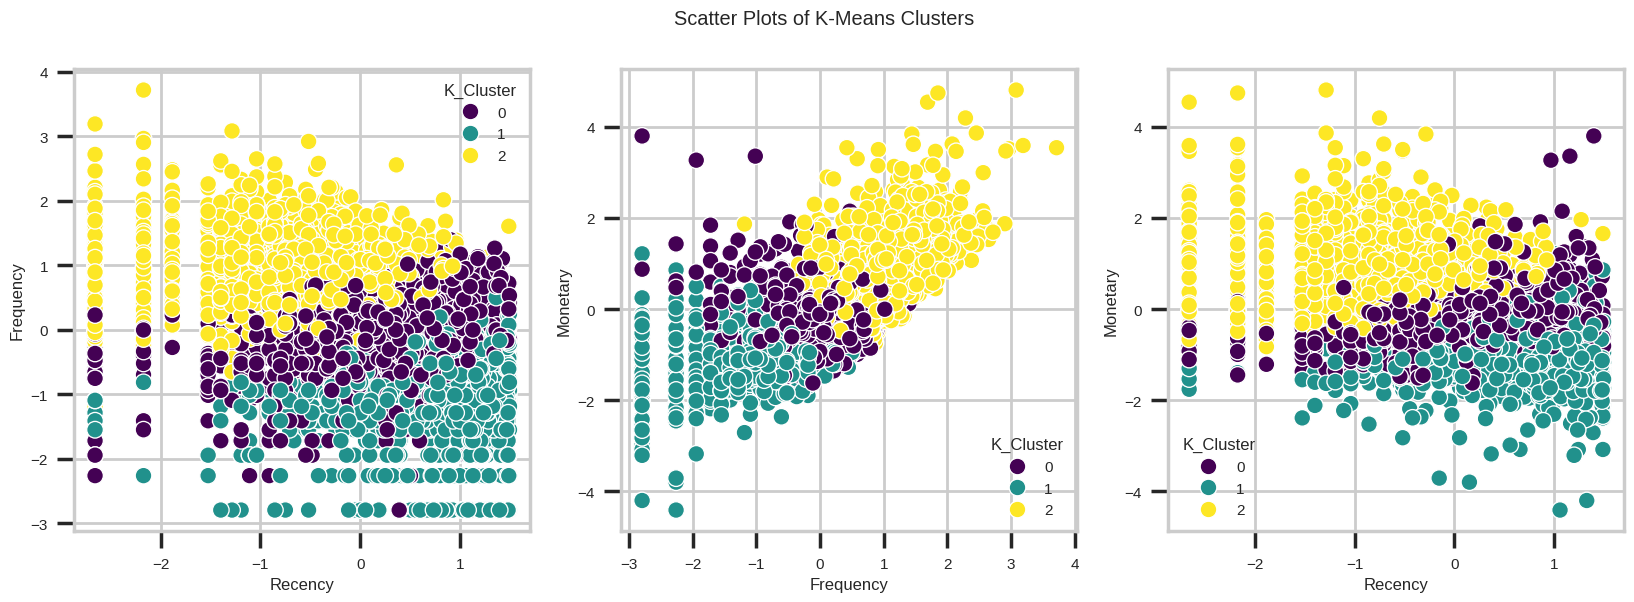

In [248]:
# visualizing K Clusters with RFM Values
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Frequency"], hue = rfm_scale["K_Cluster"], palette='viridis', ax=ax[0])
sns.scatterplot(x = rfm_scale["Frequency"], y = rfm_scale["Monetary"], hue = rfm_scale["K_Cluster"], palette='viridis', ax=ax[1])
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Monetary"], hue = rfm_scale["K_Cluster"], palette='viridis', ax=ax[2])
fig.suptitle("Scatter Plots of K-Means Clusters")

Text(0.5, 0.98, 'Scatter Plots of RFM Levels')

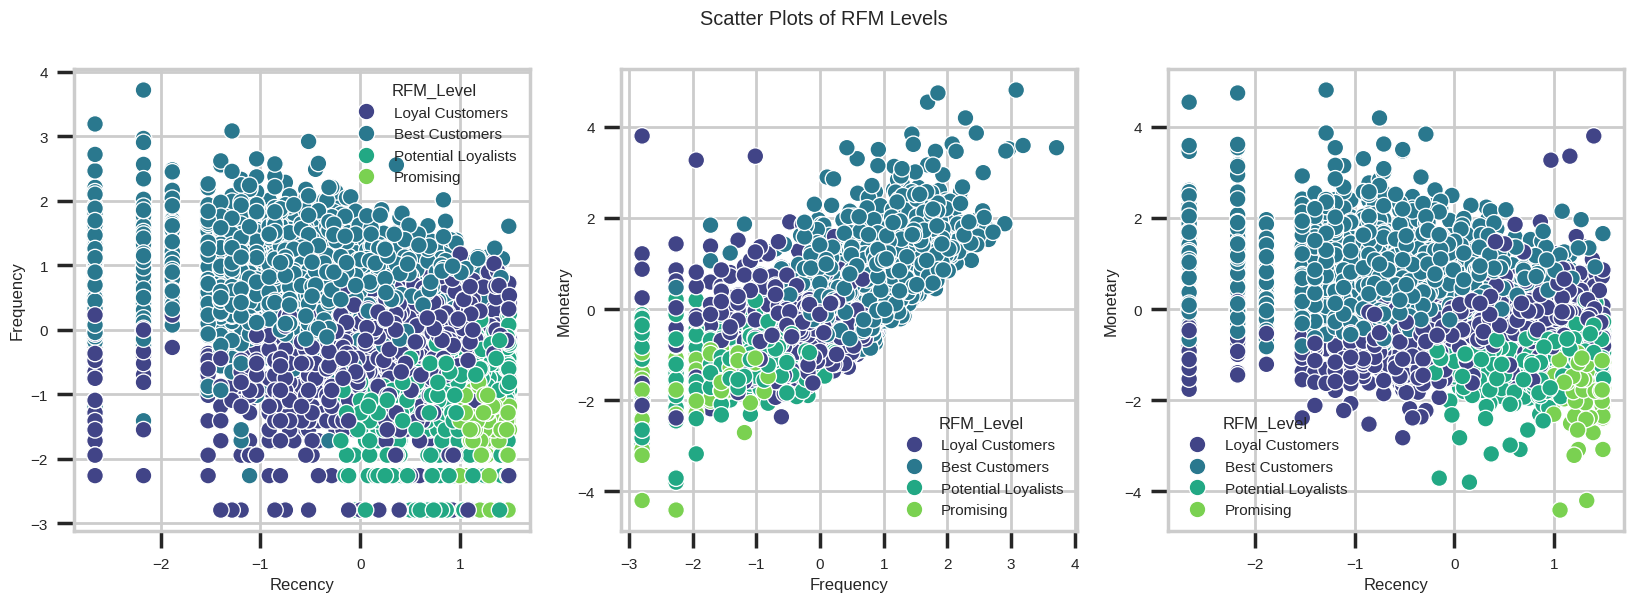

In [250]:
# visualizing RFM Groups across RFM Values
fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Frequency"], hue = rfm_scale["RFM_Level"], palette='viridis', ax=ax[0])
sns.scatterplot(x = rfm_scale["Frequency"], y = rfm_scale["Monetary"], hue = rfm_scale["RFM_Level"], palette='viridis', ax=ax[1])
sns.scatterplot(x = rfm_scale["Recency"], y = rfm_scale["Monetary"], hue = rfm_scale["RFM_Level"], palette='viridis', ax=ax[2])
fig.suptitle("Scatter Plots of RFM Levels")

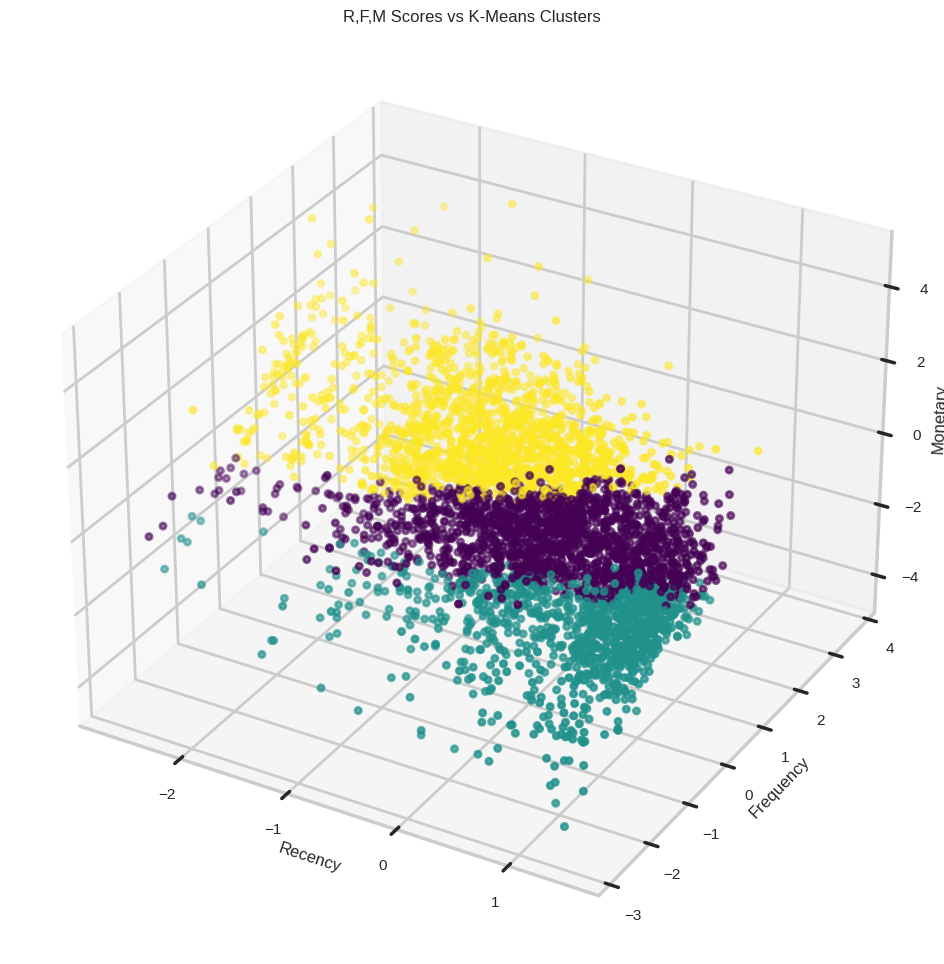

In [260]:
# 3D scatter plot of R, F & M values with the 3 K_Clusters
fig = plt.figure(figsize=(12,12))
cmap = plt.get_cmap('viridis')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_scale["Recency"], rfm_scale["Frequency"], rfm_scale["Monetary"], c = rfm_scale["K_Cluster"], cmap = cmap)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.set_title("R,F,M Scores vs K-Means Clusters")

plt.show()

• Cluster 2 is the high value customers with the highest number of orders, frequency and the most recent transactions.<br>
• Cluster 1 is the lost customers who rarely place orders with the lowest amount of sales.<br>
• Cluster 0 encompasses at risk and loyal customers with medium value of frquency, recency and monetary.<br>
• High monetary value is correlated with high frequency of orders and more recent ones in all clusters.<br>